# Chess Game Dataset

**General Info**

Dataset imported from *Kaggle* : https://www.kaggle.com/datasnaek/chess

"This is a set of just over 20,000 games collected from a selection of users on the site Lichess.org, and how to collect more. I will also upload more games in the future as I collect them. This set contains the:

    Game ID;
    Rated (T/F);
    Start Time;
    End Time;
    Number of Turns;
    Game Status;
    Winner;
    Time Increment;
    White Player ID;
    White Player Rating;
    Black Player ID;
    Black Player Rating;
    All Moves in Standard Chess Notation;
    Opening Eco (Standardised Code for any given opening, list here);
    Opening Name;
    Opening Ply (Number of moves in the opening phase)

For each of these separate games from Lichess. I collected this data using the Lichess API, which enables collection of any given users game history. The difficult part was collecting usernames to use, however the API also enables dumping of all users in a Lichess team. There are several teams on Lichess with over 1,500 players, so this proved an effective way to get users to collect games from."

**Possible Uses**

Lots of information is contained within a single chess game, let alone a full dataset of multiple games. It is primarily a game of patterns, and data science is all about detecting patterns in data, which is why chess has been one of the most invested in areas of AI in the past. This dataset collects all of the information available from 20,000 games and presents it in a format that is easy to process for analysis of, for example, what allows a player to win as black or white, how much meta (out-of-game) factors affect a game, the relationship between openings and victory for black and white and more.

## Imports and importing the Dataset

In [82]:
#import import_ipynb
#from pd_func import *
import os
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [84]:
%run pd_func.ipynb
%run plot_eda.ipynb
%run distances_func.ipynb

In [85]:
chess_data = pd.read_csv('games.csv')

In [86]:
chess_data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


## Checking for NA values

In [87]:
check_na(chess_data)

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64


It seems that there are no NA values, this is a clean dataset

## Checking for data types

In [88]:
chess_data.dtypes

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

All Data types seem to be correct. We are working with a dataset with a lot of preprocessing already done (lucky us).

### Adding a new column : Game Duration

In [89]:
game_duration = (chess_data['last_move_at'] - chess_data['created_at'])/60/60

The game duration is in hours, even if there are some absurd values (such as the longest match lasting 168290 hours)

In [90]:
(game_duration).describe()

count     20058.000000
mean        241.585292
std        1337.283914
min           0.000000
25%           0.000000
50%          66.836667
75%         220.325347
max      168290.194722
dtype: float64

In [91]:
print("There are",((game_duration) > 24*7).sum(), "games that have lasted for more than a week")

There are 6620 games that have lasted for more than a week


In [92]:
chess_data.insert(2, "game_duration", game_duration)

In [93]:
chess_data = chess_data.drop(labels=["created_at", "last_move_at"], axis=1)

### Adding a new column : Castling

In [94]:
castling = chess_data.moves.apply(categorize_castling)

In [95]:
castling.value_counts()

Both     10700
None      3636
White     3443
Black     2279
Name: moves, dtype: int64

In [96]:
chess_data['castling'] = castling

## Finding and dropping duplicate values

In [97]:
chess_data.loc[chess_data.duplicated("id", keep=False)].sort_values("id").head()

,id,rated,game_duration,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,castling
11279,061LCiAb,True,246.509444,66,draw,draw,10+15,faraon7,1630,vladimir-kramnik-1,1584,e4 e6 Nf3 d5 exd5 exd5 Bb5+ Bd7 Bxd7+ Qxd7 O-O...,C00,French Defense: Knight Variation,3,Both
10570,061LCiAb,True,246.509444,66,draw,draw,10+15,faraon7,1630,vladimir-kramnik-1,1584,e4 e6 Nf3 d5 exd5 exd5 Bb5+ Bd7 Bxd7+ Qxd7 O-O...,C00,French Defense: Knight Variation,3,Both
12208,079kHDqh,True,65.492500,32,resign,black,10+0,wiggleitjiggleit,1448,penguin_lo,1436,d4 d5 c4 Bf5 Nf3 e6 e3 Nc6 cxd5 Qxd5 Bd3 Bb4+ ...,D02,Queen's Gambit Refused: Baltic Defense,4,White
720,079kHDqh,True,0.000000,32,resign,black,10+0,wiggleitjiggleit,1448,penguin_lo,1436,d4 d5 c4 Bf5 Nf3 e6 e3 Nc6 cxd5 Qxd5 Bd3 Bb4+ ...,D02,Queen's Gambit Refused: Baltic Defense,4,White
3882,07e0uVvn,True,2777.777778,35,mate,white,30+0,chessguy9001,1259,helykopter33,1319,e4 e5 Nf3 Nf6 d3 Bc5 Nxe5 d6 Nc4 Bxf2+ Kxf2 Ng...,C42,Petrov's Defense,4,Black


In [98]:
chess_data = chess_data.drop_duplicates("id")

In [99]:
chess_data.reset_index(drop=True, inplace=True)

In [100]:
chess_data.tail()

,id,rated,game_duration,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,castling
19108,EfqH7VVH,True,89.370556,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,White
19109,WSJDhbPl,True,206.727500,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,Black
19110,yrAas0Kj,True,48.009444,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,Black
19111,b0v4tRyF,True,262.971944,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,Black
19112,N8G2JHGG,True,204.638611,78,mate,black,10+0,jamboger,1235,ffbob,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack,3,Black


## Finding outliers

Game Duration seems prone to outliers, let's check this

In [101]:
sns.set_context('notebook')

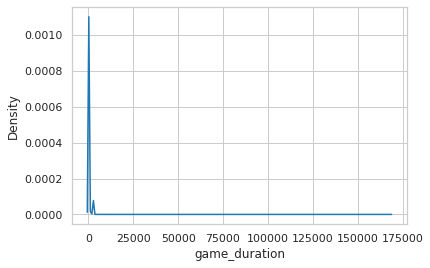

In [102]:
sns.kdeplot(chess_data['game_duration'])

In [103]:
from sklearn.ensemble import IsolationForest
identifier = IsolationForest().fit(chess_data['game_duration'].to_numpy().reshape(-1, 1))

In [104]:
identifier.predict(chess_data['game_duration'].to_numpy().reshape(-1, 1)) == -1

array([False, False, False, ...,  True, False, False])

In [105]:
index_outliers = np.where((identifier.predict(chess_data['game_duration'].to_numpy().reshape(-1, 1)) < 0))

In [106]:
index_inliers = np.where((identifier.predict(chess_data['game_duration'].to_numpy().reshape(-1, 1)) > 0))

In [107]:
len(index_outliers[0])

3742

In [108]:
len(index_inliers[0])

15371

In [109]:
chess_data.loc[index_outliers[0], 'game_duration'].describe()

count      3742.000000
mean        923.406185
std        2992.423506
min           1.755000
25%          53.804306
50%         412.774444
75%         945.949167
max      168290.194722
Name: game_duration, dtype: float64

In [110]:
chess_data.loc[index_inliers[0], 'game_duration'].describe()

count    15371.000000
mean        76.893308
std         98.204514
min          0.000000
25%          0.000000
50%          0.000000
75%        153.602222
max        318.194167
Name: game_duration, dtype: float64

It seems we might have to add a new feature : Whether a game is long (> 1 week), average (> 2 hours but < 1 week), or short (< 2 hours)

In [111]:
length_category = chess_data["game_duration"].apply(categorize_length)

In [112]:
chess_data.insert(3, "length_category", length_category)

In [113]:
chess_data.head(n=2)

,id,rated,game_duration,length_category,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,castling
0,TZJHLljE,False,0.0,short,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,None
1,l1NXvwaE,True,0.0,short,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,None


In [114]:
for length_cat in ["short", "average", "long"]:
    print(length_cat, len(chess_data.loc[chess_data['length_category'] == length_cat,  "game_duration"]))


short 8624
average 4340
long 6149


However, when analyzing the length for short, most of the games last for 0h00min.

In [115]:
chess_data.loc[chess_data['length_category'] == "short", "game_duration"].describe()

count    8624.000000
mean        0.014925
std         0.148977
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.999722
Name: game_duration, dtype: float64

There is definitely something wrong with the time in this data. Maybe games under an hour are counted as 0, it is hard to say. We will choose to ignore it for the rest of this notebook.

## Analyzing Unique Values

In [116]:
chess_data.dtypes

id                  object
rated                 bool
game_duration      float64
length_category     object
turns                int64
victory_status      object
winner              object
increment_code      object
white_id            object
white_rating         int64
black_id            object
black_rating         int64
moves               object
opening_eco         object
opening_name        object
opening_ply          int64
castling            object
dtype: object

In [117]:
print("Unique values\n")
# We ignore "increment_code" and "opening_name" 
# because there are many diff values
for column in ["rated", "victory_status", "winner"]:
    print(column, ":", chess_data[column].unique())

Unique values

rated : [False  True]
victory_status : ['outoftime' 'resign' 'mate' 'draw']
winner : ['white' 'black' 'draw']


## Plotting and Exploratory Data Analysis (EDA)

In [118]:
chess_data.sample(1)

,id,rated,game_duration,length_category,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,castling
2224,JVS21hVC,False,0.0,short,17,mate,white,10+0,doraemon61,2264,hisokaxhunter,1753,e4 e5 Nc3 c6 d4 exd4 Qxd4 c5 Qe5+ Ne7 Nb5 Qa5+...,C27,Vienna Game,3,None


### What color tends to win ?  

Let's plot the total wins in a pie chart

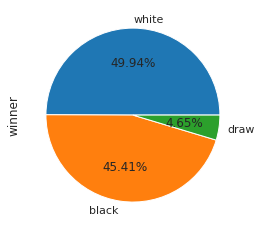

In [119]:
chess_data.winner.value_counts().plot(kind="pie", autopct='%1.2f%%')

In [120]:
print("Mean  ", "White", round(chess_data.white_rating.mean(),1), "Black", round(chess_data.black_rating.mean(),1))
print("Median", "White", chess_data.white_rating.median(), "Black", chess_data.black_rating.median())

Mean   White 1597.3 Black 1590.0
Median White 1567.0 Black 1563.0


White seems to win slightly more games than black, and there is only a small number of draws.
This can be explained by the relatively low elo of all players (Mean of 159X, median of 156X). 

At "low" level play draws are very uncommon. 

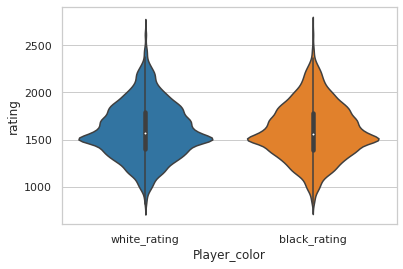

In [121]:
sns.set_style('whitegrid')
sns.violinplot(x="Player_color", y = "rating", data = chess_data[['white_rating', 'black_rating']].melt(var_name='Player_color', value_name = 'rating'))

Both black and white players have the same distribution of elo rating. Since each player is randomly assigned a color with a p=0.5 probability this is quite normal.

### Plot of victory status distribution

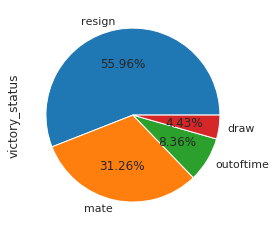

In [122]:
chess_data.victory_status.value_counts().plot(kind="pie", autopct='%1.2f%%')

It seems resigning is the most common way of ending a game.
However, the percentage of draws is not the same as the one for "winners", why is that?

In [123]:
chess_data.loc[(chess_data['winner'] == "draw") & (chess_data['victory_status'] != 'draw')].head(n=1)

,id,rated,game_duration,length_category,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,castling
176,fPPfEuu5,False,0.0,short,144,outoftime,draw,10+0,isachess,1866,teguhmaster,1843,e4 c5 Nf3 d6 g3 Nf6 d3 Nc6 Bg2 g6 O-O Bg7 Nc3 ...,B50,Sicilian Defense,4,Both


In [124]:
(len(chess_data.loc[(chess_data['victory_status'] == 'draw')]),
len(chess_data.loc[(chess_data['winner'] == 'draw')]))

(846, 888)

In [125]:
chess_data.loc[(chess_data['winner'] == "draw") & (chess_data['victory_status'] != 'draw')].victory_status.unique()

array(['outoftime'], dtype=object)

So now we know that even if a player runs out of time, this can sometimes result in a draw.
After checking the FIDE rules of Chess, article 6.9 states :

*However, the game is drawn, if the position is such that the opponent cannot checkmate the player’s king by any possible series of legal moves.*

Thus, these are probably situations where no player could win but they continued to play until one of them ran out of time.

### Influence of the number of turns on the ELO rating and victory status

In [126]:
%run plot_eda.ipynb

In [127]:
interact(plot_elo_victory_against_turns, 
         chess_data = fixed(chess_data),
         turns=widgets.IntSlider(min=1, max=260, step=1, value=10))

interactive(children=(IntSlider(value=10, description='turns', max=260, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_elo_victory_against_turns(chess_data, turns=10)>

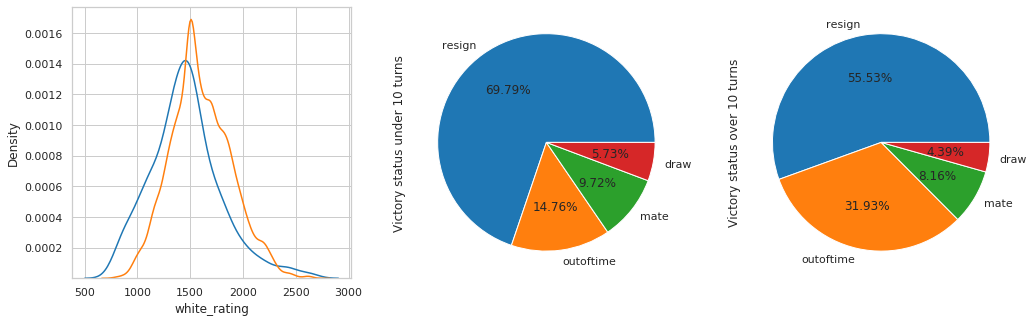

In [128]:
plot_elo_victory_against_turns(chess_data, turns=10)

### The Influence of Castling

In [129]:
chess_data.castling.value_counts()

Both     10186
None      3452
White     3292
Black     2183
Name: castling, dtype: int64

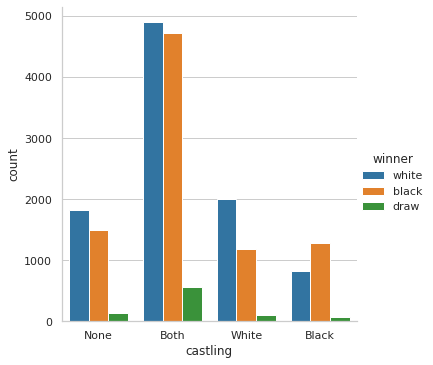

In [130]:
sns.catplot(x="castling", hue="winner", kind="count", data=chess_data)

Distribution of Elo depending on castling

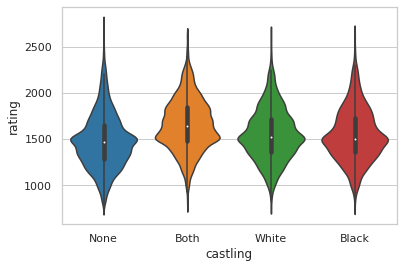

In [131]:
sns.violinplot(x="castling", y= "rating", data = chess_data.melt(id_vars="castling", value_vars=['white_rating', 'black_rating'], var_name='Player_color', value_name = 'rating'))

### Openings

In [132]:
chess_data.columns

Index(['id', 'rated', 'game_duration', 'length_category', 'turns',
       'victory_status', 'winner', 'increment_code', 'white_id',
       'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco',
       'opening_name', 'opening_ply', 'castling'],
      dtype='object')

In [133]:
print(f"There are {len(chess_data.opening_name.unique())} unique openings grouped"+\
      f" in {len(chess_data.opening_eco.unique())} unique Eco codes")

There are 1477 unique openings grouped in 365 unique Eco codes


**Eco Ratings Explanations** (from *http://www.eudesign.com/chessops/eco/index.htm*)

- **A00-A39** : = FLANK OPENINGS (neither 1.d4 nor 1.e4) - includes English Opening
- **A40-A44** = QP OPENING without 1..d5 or 1..f5 or 1..Nf6 reply
- **A45-A49** = QP OPENING, INDIAN DEFENCE (1.d4 Nf6) without 2.c4
- **A50-A79** = QP OPENING, INDIAN DEFENCE with 2.c4 but without 2..e6 or 2..g6
- **A80-A99** = QP OPENING with 1..f5 reply (= Dutch Defence)
- **B00-B19** = KP OPENING without 1..c5, ..1.e6 or ..1.e5 - incl. Alekhine, Caro-Kann Defs.
- **B20-B99** = KP OPENING with 1..c5 reply (= Sicilian Defence)
- **C00-C19** = KP OPENING with 1..e6 reply (= French Defence)
- **C20-C99** = KP OPENING with 1..e5 reply (= Mutual King's Pawn, incl. Ruy Lopez)
- **D00-D05** = QP GAME (1.d4 d5) without 2.c4 (= Queen's Pawn Game)
- **D06-D69** = QP GAME (1.d4 d5) with 2.c4 (= Queen's Gambit)
- **D70-D99** = QP, INDIAN DEF. (1.d4 Nf6, 2.c4 g6) with early ..d5 (= Grunfeld Defence)
- **E00-E59** = QP, INDIAN DEF. (1.d4 Nf6) with 2.c4 e6 - includes Catalan Opening
- **E60-E99** = QP, INDIAN DEF. (1.d4 Nf6, 2.c4 g6) without early ..d5 (= King's Indian)

In [134]:
chess_data.groupby("opening_eco").opening_name.unique().apply(len).sort_values(ascending=False)

opening_eco
A00    50
B00    39
D00    32
C00    25
A40    24
       ..
B93     1
B91     1
D58     1
B88     1
E98     1
Name: opening_name, Length: 365, dtype: int64

In [135]:
chess_data.groupby(chess_data.opening_eco.str[0]).opening_name.unique().apply(len).sort_values(ascending=False)

opening_eco
C    499
B    363
A    297
D    218
E    104
Name: opening_name, dtype: int64

In [136]:
%run plot_eda.ipynb

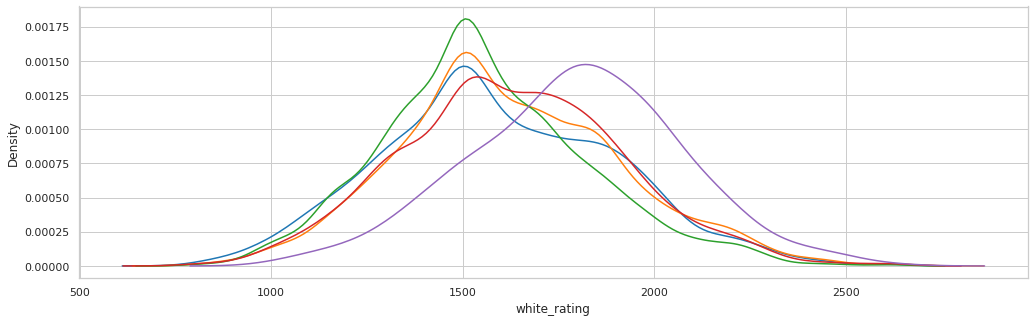

In [137]:
plot_kde_rating_for_opening_categories(chess_data)

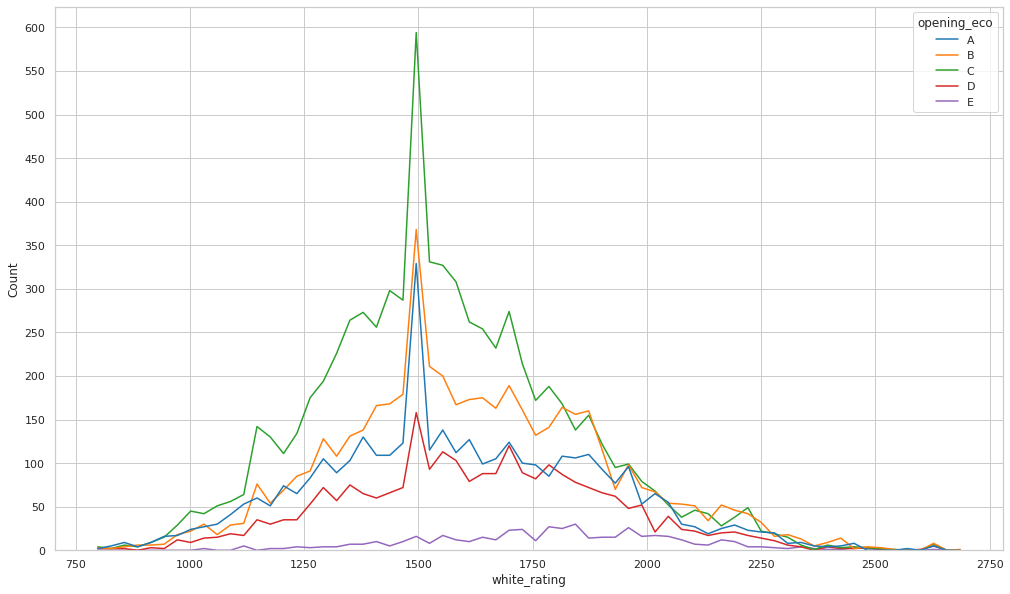

In [138]:
plot_count_rating_for_opening_categories(chess_data)

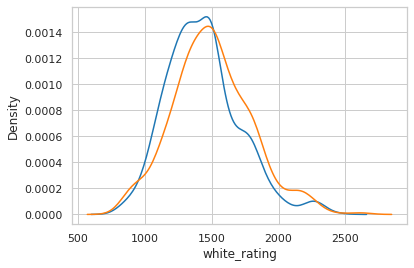

In [139]:
sns.kdeplot(chess_data.loc[chess_data["opening_eco"] == "A00"].white_rating)
sns.kdeplot(chess_data.loc[chess_data["opening_eco"] == "A00"].black_rating)

It seems, funnily enough, that lower elo players try unconventional openings against opponents "stronger" than them on paper.

In [140]:
#chess_data.groupby("opening_eco").apply(lambda g: g[g['opening_eco'] == "A00"])

### Pairplot/Jointplot

In [141]:
chess_data.columns

Index(['id', 'rated', 'game_duration', 'length_category', 'turns',
       'victory_status', 'winner', 'increment_code', 'white_id',
       'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco',
       'opening_name', 'opening_ply', 'castling'],
      dtype='object')

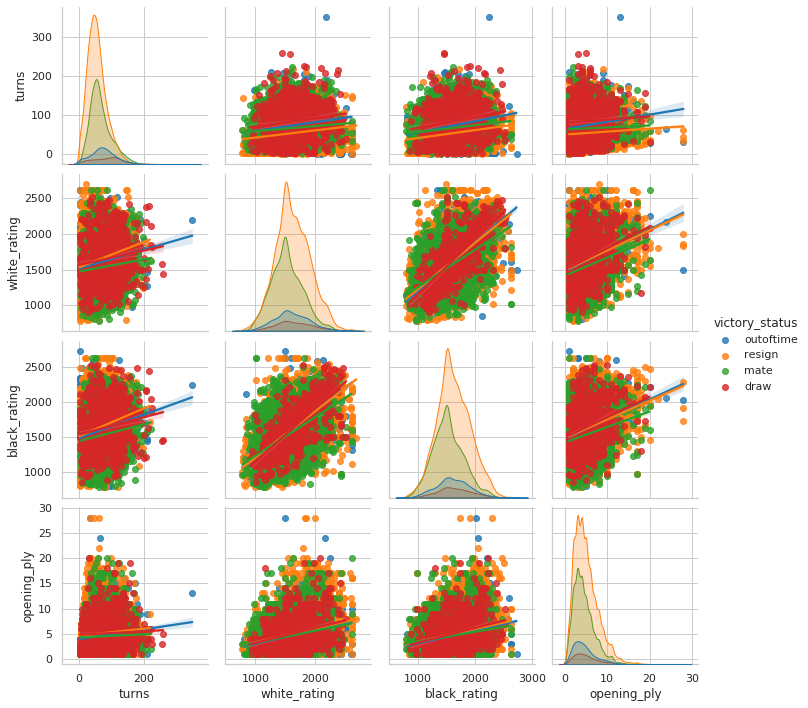

In [142]:
sns.pairplot(chess_data[[column for column in chess_data.columns if column not in ["id" , "game_duration", "rated"]]],
             hue = "victory_status",
             kind="reg"
            )

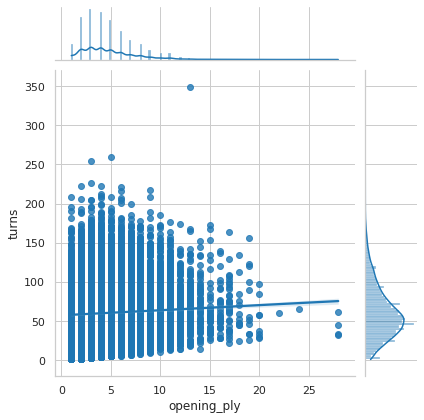

In [143]:
sns.jointplot(x = "opening_ply", y="turns", 
              kind="reg", 
              data = chess_data)

In [144]:
len(chess_data.loc[chess_data["turns"]<20])*100/len(chess_data)

8.130591743839272

## Correlation

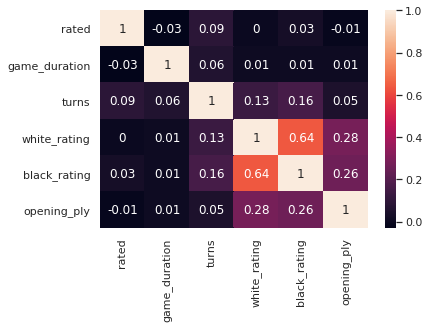

In [145]:
sns.heatmap(round(chess_data.corr(),2), annot=True)

## Fun Visualization of Most common position for each piece

In [146]:
%run most_common_position.ipynb 

In [147]:
s_moves = chess_data.moves

In [148]:
s_moves[127]

'e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 d5 exd5 Nxd5 Nxf7 Kxf7 Qf3+ Ke8 Bxd5 Qe7 d3 Nd4 Qd1 c6 Bc4 b5 Bb3 Bf5 c3 Nxb3 axb3 Rd8 d4 exd4+ Kf1 dxc3 Qe1 Bd3+ Kg1 Qxe1#'

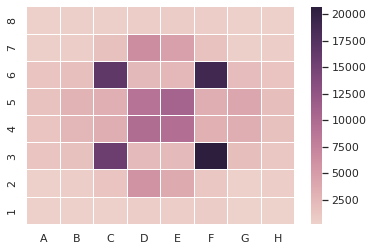

In [149]:
piece_type = "knight"
heatmap_positions(piece_type, chess_data)

In [150]:
interact(heatmap_positions, 
         piece_type = ["pawn", "rook", "queen", "bishop", "knight", "king"], 
         chess_data = fixed(chess_data),
         player = ["Both", "White", "Black"],
         annotation = False)

interactive(children=(Dropdown(description='piece_type', options=('pawn', 'rook', 'queen', 'bishop', 'knight',…

<function __main__.heatmap_positions(piece_type, chess_data, player='Both', annotation=False)>

# Creating an Opening Recommender System based on content filtering 
No evolution in time, takes a single feature vector as input

## Choosing Features and Feature Engineering

We need to compute some kind of distance from openings using certain features and clustering
In order to recommend some openings, the following seem like important features (list not exaustive):

* is_gambit
* complexity of the opening (is this opening easy to play ?)
* close position or open position
* player is black or white
* elo rating player and opponent
* opening category
* type of castling ? 

In [151]:
chess_data.head(n=1)

,id,rated,game_duration,length_category,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,castling
0,TZJHLljE,False,0.0,short,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,None


In [152]:
unique_value_counts = chess_data.loc[:, "opening_name"].value_counts()

In [153]:
unique_value_counts["Sicilian Defense"]

349

In [154]:
chess_data.groupby("opening_name").filter(lambda g : g.opening_name.size > 10).shape

(15605, 17)

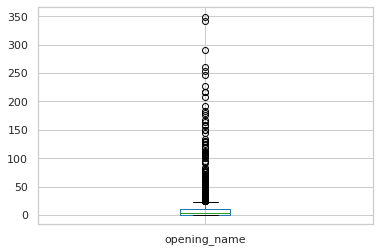

In [155]:
chess_data.loc[:,["opening_eco", "opening_name"]].opening_name.value_counts().plot(kind="box")

In [156]:
X = chess_data.copy()

In [157]:
X.drop(labels=[column for column in X.columns if column not in ["castling", 
                                                                "opening_ply", 
                                                                "opening_name", 
                                                                "opening_eco",
                                                                "moves", 
                                                                "black_rating",
                                                                "white_rating", 
                                                                "winner",
                                                                "turns"]],
      axis = 1,
      inplace = True)

In [158]:
X.head(n=1)

,turns,winner,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,castling
0,13,white,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,None


We isolate the openings that appear more than 10 times in the data

In [159]:
X = X.groupby("opening_name").filter(lambda g : g.opening_name.size > 10).reset_index(drop=True)

In [160]:
X = X[X.moves.str.split(" ").map(len) > 5].reset_index(drop=True)

In [161]:
X.shape

(15268, 9)

### opening_name

### is_gambit

In [162]:
count = 0
for el in sorted(X.groupby("opening_name").filter(lambda g : g.opening_name.size > 10).opening_name.unique()):
    if "Gambit" in el or "gambit" in el:
        count += 1
        print(el)
print(round(count/len(X.groupby("opening_name").filter(lambda g : g.opening_name.size > 10).opening_name.unique())*100, 2), "% of openings are Gambits")

Benoni Defense: Benoni Gambit Accepted
Bishop's Opening: Ponziani Gambit
Blackmar-Diemer Gambit
Danish Gambit
Danish Gambit Accepted
Danish Gambit Accepted |  Copenhagen Defense
Duras Gambit
Elephant Gambit
Elephant Gambit: Paulsen Countergambit
Englund Gambit
Englund Gambit Declined |  Reversed French
French Defense: Advance Variation |  Milner-Barry Gambit
Italian Game: Classical Variation |  Albin Gambit
Italian Game: Classical Variation |  Greco Gambit |  Traditional Line
Italian Game: Schilling-Kostic Gambit
King's Gambit
King's Gambit Accepted |  Bishop's Gambit
King's Gambit Accepted |  Fischer Defense
King's Gambit Accepted |  King's Knight Gambit
King's Gambit Accepted |  MacLeod Defense
King's Gambit Accepted |  Schallopp Defense
King's Gambit Declined |  Queen's Knight Defense
King's Pawn Game: Beyer Gambit
King's Pawn Game: Busch-Gass Gambit
King's Pawn Game: Gunderam Gambit
King's Pawn Game: Wayward Queen Attack |  Kiddie Countergambit
Queen's Gambit
Queen's Gambit Accepte

In [163]:
for el in sorted(X.groupby("opening_name").filter(lambda g : g.opening_name.size > 10).opening_name.unique()):
    print(el)

Alekhine Defense
Alekhine Defense: Maroczy Variation
Alekhine Defense: Mokele Mbembe
Alekhine Defense: Normal Variation
Alekhine Defense: Scandinavian Variation
Alekhine Defense: Two Pawn Attack
Anderssen Opening
Barnes Defense
Benoni Defense: Benoni Gambit Accepted
Bird Opening
Bird Opening: Dutch Variation
Bishop's Opening
Bishop's Opening: Berlin Defense
Bishop's Opening: Boi Variation
Bishop's Opening: Philidor Counterattack
Bishop's Opening: Ponziani Gambit
Blackmar-Diemer Gambit
Budapest Defense: Adler Variation
Caro-Kann Defense
Caro-Kann Defense: Advance Variation
Caro-Kann Defense: Advance Variation |  Botvinnik-Carls Defense
Caro-Kann Defense: Advance Variation |  Short Variation
Caro-Kann Defense: Classical Variation
Caro-Kann Defense: Exchange Variation
Caro-Kann Defense: Hillbilly Attack
Caro-Kann Defense: Two Knights Attack
Center Game
Center Game #2
Center Game: Berger Variation
Center Game: Normal Variation
Center Game: Paulsen Attack Variation
Colle System
Danish Gambi

In [164]:
X.shape

(15268, 9)

In [165]:
X["is_gambit"] = X["opening_name"].apply(lambda t : 1 if ("Gambit" in t or "gambit" in t) else 0)

In [166]:
X[X["is_gambit"] == 1]

,turns,winner,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,castling,is_gambit
5,66,black,1439,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6,Both,1
20,13,black,1113,1423,e4 c5 d4 cxd4 Qxd4 Nc6 Qa4 e5 Be3 Nf6 Nf3 h6 Nc3,B21,Sicilian Defense: Smith-Morra Gambit #2,3,None,1
24,66,black,1077,1148,d4 d5 c4 Nf6 Nc3 Nc6 Nf3 e6 e3 Bd6 Bd3 Ne4 Bxe...,D06,Queen's Gambit Refused: Marshall Defense,4,Both,1
25,64,black,1358,1036,e4 c5 d4 cxd4 Qxd4 Nc6 Qa4 Nf6 Nc3 g6 Nf3 Bg7 ...,B21,Sicilian Defense: Smith-Morra Gambit #2,3,Both,1
28,21,black,1019,1500,d4 d5 c4 dxc4 e4 b5 Na3 a6 Qf3 f6 e5 fxe5 Qxa8...,D20,Queen's Gambit Accepted: Central Variation | ...,6,None,1
...,...,...,...,...,...,...,...,...,...,...
15198,56,white,1646,1684,e4 e5 Nf3 Nc6 Bb5 Nf6 O-O Nxe4 Re1 Nd6 Nxe5 Nx...,C67,Ruy Lopez: Berlin Defense | Rio Gambit Accepted,8,Both,1
15227,57,white,2058,1833,d4 d5 c4 e5 dxe5 d4 Nf3 Nc6 a3 Bg4 Bf4 Bc5 b4 ...,D08,Queen's Gambit Refused: Albin Countergambit | ...,7,White,1
15228,45,white,2050,1894,d4 d5 c4 dxc4 e3 c5 Bxc4 cxd4 exd4 Nf6 Nf3 Bg4...,D20,Queen's Gambit Accepted: Old Variation,5,Both,1
15231,119,draw,2049,1895,d4 d5 c4 e6 Nc3 dxc4 e4 g6 Bxc4 Bg7 Nf3 c6 O-O...,D31,Queen's Gambit Declined: Queen's Knight Variation,5,Both,1


### difficulty
TODO

### position_type ('closed', 'open', 'semi-open', 'semi-closed', 'indian', 'other')

In [167]:
%run pd_func.ipynb

In [168]:
X["position_type"] = X["moves"].apply(categorize_position)

In [169]:
X.head(n=1)

,turns,winner,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,castling,is_gambit,position_type
0,13,white,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,None,0,closed


### player_color
Done **???**

**Eco Ratings Explanations** (from *http://www.eudesign.com/chessops/eco/index.htm*)

Who chooses to do the opening ? 
- **A00-A39** : = FLANK OPENINGS (neither 1.d4 nor 1.e4) - includes English Opening -> White
- **A40-A44** = QP OPENING without 1..d5 or 1..f5 or 1..Nf6 reply -> Black
- **A45-A49** = QP OPENING, INDIAN DEFENCE (1.d4 Nf6) without 2.c4 -> White
- **A50-A79** = QP OPENING, INDIAN DEFENCE with 2.c4 but without 2..e6 or 2..g6 -> Black
- **A80-A99** = QP OPENING with 1..f5 reply (= Dutch Defence) -> Black
- **B00-B19** = KP OPENING without 1..c5, ..1.e6 or ..1.e5 - incl. Alekhine, Caro-Kann Defs. -> Black
- **B20-B99** = KP OPENING with 1..c5 reply (= Sicilian Defence) -> Black
- **C00-C19** = KP OPENING with 1..e6 reply (= French Defence) -> Black
- **C20-C99** = KP OPENING with 1..e5 reply (= Mutual King's Pawn, incl. Ruy Lopez) -> Black
- **D00-D05** = QP GAME (1.d4 d5) without 2.c4 (= Queen's Pawn Game) -> White
- **D06-D69** = QP GAME (1.d4 d5) with 2.c4 (= Queen's Gambit) -> White
- **D70-D99** = QP, INDIAN DEF. (1.d4 Nf6, 2.c4 g6) with early ..d5 (= Grunfeld Defence) -> Black
- **E00-E59** = QP, INDIAN DEF. (1.d4 Nf6) with 2.c4 e6 - includes Catalan Opening -> Black/White
- **E60-E99** = QP, INDIAN DEF. (1.d4 Nf6, 2.c4 g6) without early ..d5 (= King's Indian) -> Black

In [171]:
X["player_color"] = X.opening_eco.apply(categorize_player_choice)

### elo_rating

In [195]:
%run pd_func.ipynb

In [189]:
X["elo_rating"] = X[["player_color", "black_rating", "white_rating"]].apply(choose_elo, axis = 1)

### opponent_rating 

In [199]:
X["opponent_rating"] = X[["player_color", "black_rating", "white_rating"]].apply(choose_elo, axis = 1, opponent=True)

### opening_category
We can use complete type or just the first letter, rather let's use the definitions used earlier for ranges of opening categories

In [200]:
X["opening_category"] = X.opening_eco.apply(categorize_eco)

In [201]:
X.head(n=1)

,turns,winner,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,castling,is_gambit,position_type,player_color,elo_rating,opponent_rating,opening_category
0,13,white,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,None,0,closed,White,1500.0,1191.0,QP GAME (1.d4 d5) with 2.c4 (= Queen's Gambit)


### castling_type
Done

## Creating our dataframe by dropping some columns

In [245]:
X_train = X.drop(columns=["turns", "winner", "moves", "opening_eco", "opening_name", 
                          "white_rating", "black_rating", "opening_ply"])

In [246]:
X_train.dtypes

castling             object
is_gambit             int64
position_type        object
player_color         object
elo_rating          float64
opponent_rating     float64
opening_category     object
dtype: object

Let's convert our categorical data into numbers

In [247]:
X_train = pd.concat([X_train, pd.get_dummies(X_train.castling, prefix='castling')], axis = 1).drop(columns=["castling"])

In [248]:
X_train = pd.concat([X_train, pd.get_dummies(X_train.position_type, prefix='position')], axis = 1).drop(columns=["position_type"])

In [250]:
X_train = pd.concat([X_train, pd.get_dummies(X_train.opening_category, prefix='opening')], axis = 1).drop(columns=["opening_category"])

AttributeError: 'DataFrame' object has no attribute 'opening_category'

In [251]:
X_train = pd.concat([X_train, pd.get_dummies(X_train.player_color, prefix='player')], axis = 1).drop(columns=["player_color"])

In [252]:
X_train.dtypes

is_gambit                                                                                 int64
elo_rating                                                                              float64
opponent_rating                                                                         float64
castling_Black                                                                            uint8
castling_Both                                                                             uint8
castling_None                                                                             uint8
castling_White                                                                            uint8
position_closed                                                                           uint8
position_flank                                                                            uint8
position_indian                                                                           uint8
position_open                           

In [253]:
X_train

,is_gambit,elo_rating,opponent_rating,castling_Black,castling_Both,castling_None,castling_White,position_closed,position_flank,position_indian,...,opening_QP OPENING with 1..f5 reply (= Dutch Defence),opening_QP OPENING without 1..d5 or 1..f5 or 1..Nf6 reply,"opening_QP OPENING, INDIAN DEFENCE (1.d4 Nf6) without 2.c4","opening_QP OPENING, INDIAN DEFENCE with 2.c4 but without 2..e6 or 2..g6","opening_QP, INDIAN DEF. (1.d4 Nf6) with 2.c4 e6 - includes Catalan Opening","opening_QP, INDIAN DEF. (1.d4 Nf6, 2.c4 g6) with early ..d5 (= Grunfeld Defence)","opening_QP, INDIAN DEF. (1.d4 Nf6, 2.c4 g6) without early ..d5 (= King's Indian)",player_Black,player_Black/White,player_White
0,0,1500.0,1191.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1500.0,1496.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1439.0,1454.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1469.0,1523.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,2108.0,1413.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15263,0,1220.0,1691.0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
15264,0,1196.0,1233.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
15265,0,1219.0,1286.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
15266,0,1227.0,1360.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [274]:
cos_similarity(X_train.loc[0], X_train.loc[10911])
similarities[10900:10912]

[0.9926980062119863,
 0.9938590798685496,
 0.9935902301109155,
 0.9720760741939286,
 0.9839859182106139,
 0.9839864413291243,
 0.995116234231243,
 0.9999980480860116,
 0.9999977939556745,
 0.9986506061674579,
 0.9988684804622351,
 0.9988695289688537]

In [262]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standardized_X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)

In [263]:
standardized_X_train

,is_gambit,elo_rating,opponent_rating,castling_Black,castling_Both,castling_None,castling_White,position_closed,position_flank,position_indian,...,opening_QP OPENING with 1..f5 reply (= Dutch Defence),opening_QP OPENING without 1..d5 or 1..f5 or 1..Nf6 reply,"opening_QP OPENING, INDIAN DEFENCE (1.d4 Nf6) without 2.c4","opening_QP OPENING, INDIAN DEFENCE with 2.c4 but without 2..e6 or 2..g6","opening_QP, INDIAN DEF. (1.d4 Nf6) with 2.c4 e6 - includes Catalan Opening","opening_QP, INDIAN DEF. (1.d4 Nf6, 2.c4 g6) with early ..d5 (= Grunfeld Defence)","opening_QP, INDIAN DEF. (1.d4 Nf6, 2.c4 g6) without early ..d5 (= King's Indian)",player_Black,player_Black/White,player_White
0,-0.34773,-0.232743,-1.402811,-0.368110,-1.067087,2.200703,-0.463916,2.769490,-0.283388,-0.215403,...,-0.069788,-0.213733,-0.14678,-0.045106,-0.090488,-0.029192,-0.084009,-1.580704,-0.090488,1.612744
1,-0.34773,-0.232743,-0.283509,-0.368110,-1.067087,2.200703,-0.463916,-0.361077,-0.283388,-0.215403,...,-0.069788,-0.213733,-0.14678,-0.045106,-0.090488,-0.029192,-0.084009,0.632630,-0.090488,-0.620061
2,-0.34773,-0.451936,-0.437643,-0.368110,0.937131,-0.454400,-0.463916,2.769490,-0.283388,-0.215403,...,-0.069788,-0.213733,-0.14678,-0.045106,-0.090488,-0.029192,-0.084009,-1.580704,-0.090488,1.612744
3,-0.34773,-0.344136,-0.184423,-0.368110,0.937131,-0.454400,-0.463916,-0.361077,-0.283388,-0.215403,...,-0.069788,-0.213733,-0.14678,-0.045106,-0.090488,-0.029192,-0.084009,0.632630,-0.090488,-0.620061
4,-0.34773,1.952001,-0.588106,-0.368110,-1.067087,2.200703,-0.463916,-0.361077,-0.283388,-0.215403,...,-0.069788,-0.213733,-0.14678,-0.045106,-0.090488,-0.029192,-0.084009,0.632630,-0.090488,-0.620061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15263,-0.34773,-1.238875,0.432110,-0.368110,-1.067087,-0.454400,2.155563,-0.361077,-0.283388,-0.215403,...,14.329142,-0.213733,-0.14678,-0.045106,-0.090488,-0.029192,-0.084009,0.632630,-0.090488,-0.620061
15264,-0.34773,-1.325114,-1.248678,2.716579,-1.067087,-0.454400,-0.463916,-0.361077,-0.283388,-0.215403,...,-0.069788,4.678734,-0.14678,-0.045106,-0.090488,-0.029192,-0.084009,0.632630,-0.090488,-0.620061
15265,-0.34773,-1.242468,-1.054176,2.716579,-1.067087,-0.454400,-0.463916,2.769490,-0.283388,-0.215403,...,-0.069788,-0.213733,-0.14678,-0.045106,-0.090488,-0.029192,-0.084009,-1.580704,-0.090488,1.612744
15266,-0.34773,-1.213721,-0.782608,2.716579,-1.067087,-0.454400,-0.463916,-0.361077,-0.283388,-0.215403,...,-0.069788,-0.213733,-0.14678,-0.045106,-0.090488,-0.029192,-0.084009,0.632630,-0.090488,-0.620061


In [254]:
X[X.opening_name == "Slav Defense: Exchange Variation"]

,turns,winner,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,castling,is_gambit,position_type,player_color,elo_rating,opponent_rating,opening_category
0,13,white,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,None,0,closed,White,1500.0,1191.0,QP GAME (1.d4 d5) with 2.c4 (= Queen's Gambit)
535,35,white,1387,1399,d4 d5 c4 c6 cxd5 cxd5 Nc3 e6 Nf3 Nf6 Bg5 Be7 e...,D10,Slav Defense: Exchange Variation,5,None,0,closed,White,1387.0,1399.0,QP GAME (1.d4 d5) with 2.c4 (= Queen's Gambit)
1899,86,black,1839,1651,d4 d5 c4 c6 cxd5 cxd5 Nc3 Nf6 Nf3 Bf5 Bg5 e6 N...,D10,Slav Defense: Exchange Variation,5,Both,0,closed,White,1839.0,1651.0,QP GAME (1.d4 d5) with 2.c4 (= Queen's Gambit)
3042,78,black,1148,1417,d4 d5 c4 c6 cxd5 cxd5 Bf4 Nc6 Qa4 Bd7 Nc3 Nf6 ...,D10,Slav Defense: Exchange Variation,5,Black,0,closed,White,1148.0,1417.0,QP GAME (1.d4 d5) with 2.c4 (= Queen's Gambit)
7245,53,white,2000,1707,d4 c6 c4 d5 cxd5 cxd5 Nc3 Nf6 f3 Bf5 Bg5 e6 e4...,D10,Slav Defense: Exchange Variation,5,White,0,semi-closed,White,2000.0,1707.0,QP GAME (1.d4 d5) with 2.c4 (= Queen's Gambit)
9117,70,black,1779,1015,d4 d5 c4 c6 cxd5 cxd5 Nc3 Nf6 Nf3 Nc6 Bf4 e6 e...,D10,Slav Defense: Exchange Variation,5,White,0,closed,White,1779.0,1015.0,QP GAME (1.d4 d5) with 2.c4 (= Queen's Gambit)
9614,26,black,1446,1572,d4 d5 c4 c6 cxd5 Qxd5 Nc3 Qd8 Bf4 e6 a3 Bd6 Bx...,D10,Slav Defense: Exchange Variation,5,Both,0,closed,White,1446.0,1572.0,QP GAME (1.d4 d5) with 2.c4 (= Queen's Gambit)
10048,84,black,2237,1742,d4 c6 c4 d5 cxd5 cxd5 Nf3 Bg4 Ne5 Bh5 Qb3 b6 e...,D10,Slav Defense: Exchange Variation,5,White,0,semi-closed,White,2237.0,1742.0,QP GAME (1.d4 d5) with 2.c4 (= Queen's Gambit)
10112,28,black,1775,1786,d4 d5 c4 c6 cxd5 cxd5 Nc3 Nf6 Bf4 Nc6 e3 Bf5 Q...,D10,Slav Defense: Exchange Variation,5,None,0,closed,White,1775.0,1786.0,QP GAME (1.d4 d5) with 2.c4 (= Queen's Gambit)
10117,152,black,1838,2053,d4 d5 c4 c6 cxd5 cxd5 Nc3 Nf6 Bf4 Nc6 e3 Bf5 Q...,D10,Slav Defense: Exchange Variation,5,None,0,closed,White,1838.0,2053.0,QP GAME (1.d4 d5) with 2.c4 (= Queen's Gambit)


In [255]:
similarities = []
for i in range(1, len(X_train)):
    similarities.append(cos_similarity(X_train.loc[0], X_train.loc[i]))

In [275]:
similarities = []
for i in range(1, len(standardized_X_train)):
    similarities.append(cos_similarity(standardized_X_train.loc[0], standardized_X_train.loc[i]))

In [266]:
euclidian_distances = []
for i in range(1, len(standardized_X_train)):
    euclidian_distances.append(euclidean_distance(standardized_X_train.loc[0], standardized_X_train.loc[i]))

In [269]:
np.argmin(euclidian_distances)

10911

In [272]:
euclidian_distances[10911]

0.43279467378305847

In [276]:
np.argmax(similarities)

10911

In [257]:
X_train.loc[0]

is_gambit                                                                                  0.0
elo_rating                                                                              1500.0
opponent_rating                                                                         1191.0
castling_Black                                                                             0.0
castling_Both                                                                              0.0
castling_None                                                                              1.0
castling_White                                                                             0.0
position_closed                                                                            1.0
position_flank                                                                             0.0
position_indian                                                                            0.0
position_open                                     

In [270]:
X_train.loc[10911]

is_gambit                                                                                  0.0
elo_rating                                                                              1617.0
opponent_rating                                                                         1163.0
castling_Black                                                                             0.0
castling_Both                                                                              1.0
castling_None                                                                              0.0
castling_White                                                                             0.0
position_closed                                                                            0.0
position_flank                                                                             0.0
position_indian                                                                            0.0
position_open                                     

In [236]:
X.loc[0]

turns                                                              13
winner                                                          white
white_rating                                                     1500
black_rating                                                     1191
moves               d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
opening_eco                                                       D10
opening_name                         Slav Defense: Exchange Variation
opening_ply                                                         5
castling                                                         None
is_gambit                                                           0
position_type                                                  closed
player_color                                                    White
elo_rating                                                       1500
opponent_rating                                                  1191
opening_category    

In [271]:
X.loc[10911]

turns                                                              50
winner                                                          white
white_rating                                                     1163
black_rating                                                     1617
moves               e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 Bg5 Bg7 B...
opening_eco                                                       B70
opening_name                       Sicilian Defense: Dragon Variation
opening_ply                                                        10
castling                                                         Both
is_gambit                                                           0
position_type                                               semi-open
player_color                                                    Black
elo_rating                                                       1617
opponent_rating                                                  1163
opening_category    

In [222]:
X_train.loc[11669]

opening_ply                                                                                5.0
is_gambit                                                                                  0.0
elo_rating                                                                              1554.0
opponent_rating                                                                         1347.0
castling_Black                                                                             0.0
castling_Both                                                                              0.0
castling_None                                                                              1.0
castling_White                                                                             0.0
position_closed                                                                            1.0
position_flank                                                                             0.0
position_indian                                   